In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
plt.style.use("fivethirtyeight")

In [30]:
df=pd.read_csv("2022_02_08-02_30_31_AM.csv")

In [31]:
df.head(5)

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw


In [32]:
df.isnull().sum()

uuid                       0
price_string         8220000
price_string_unf    13420000
product_type           10000
level_1                50000
category               10000
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730000 entries, 0 to 13729999
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   uuid              object
 1   price_string      object
 2   price_string_unf  object
 3   product_type      object
 4   level_1           object
 5   category          object
dtypes: object(6)
memory usage: 628.5+ MB


# Changing DataType As Per Relevancy

In [34]:
# Converting "Object" to "str" as per need to solve problem
df["price_string"]=df["price_string"].astype("str")
df["price_string_unf"]=df["price_string_unf"].astype("str")
df["product_type"]=df["product_type"].astype("str")
df["level_1"]=df["level_1"].astype("str")
df["category"]=df["category"].astype("str")

In [35]:
sf=df  #Backup dataframe

# Product Without Prices

In [36]:
product_widout_price=df[(df["price_string"]=="nan") &(df["price_string_unf"]=="nan") &(df["product_type"]!="nan") &(df["level_1"]!="nan")&(df["category"]!="nan")]

In [37]:
# Count Of Product Without Price
pwp=product_widout_price.shape[0]
pwp

8110000

# Product With Prices

In [38]:
product_wid_price=df[(df["price_string"]!="nan") &(df["price_string_unf"]!="nan") &(df["product_type"]!="nan") &(df["level_1"]!="nan")&(df["category"]!="nan")]

In [39]:
# Count Of Product With Price
pp=product_wid_price.shape[0]
pp

240000

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


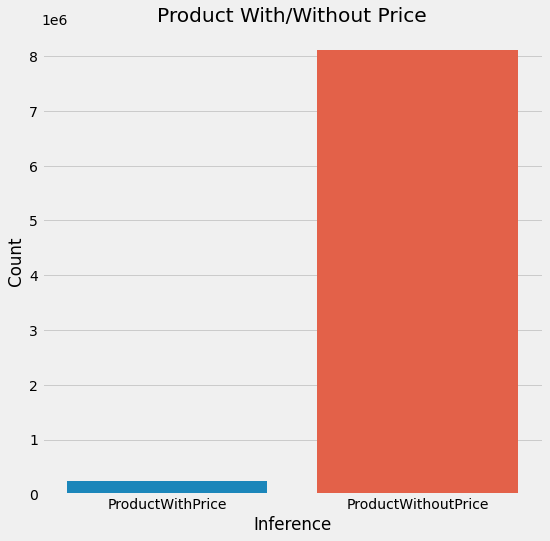

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

plt.figure(figsize=(8,8))
plt.title("Product With/Without Price")
plt.xlabel("Inference")
plt.ylabel("Count")
y=[pp,pwp]
x=["ProductWithPrice","ProductWithoutPrice"]
sns.barplot(x,y)
plt.show()
#plt.savefig('p1.png')

# Correct Product Prices in the correct format wherever possible and separate them into currency and value columns.

In [41]:
# function to correct price
print("Correcting Product Prices in the correct format.....\n")
def correct_price(price):
    if(price=="nan"):
        price=price
    elif(price[0]=="$"):
        price=price
    elif(price[0]!="$"):
        price="$"+price
    return price
print("Corrected!!\n")

# function to remove "$" so that i can convert it into float column for calculation
print("Getting Price Value.....\n")
def get_price(price):
    if(price=="nan"):
        price=np.nan
    elif(price[0]=="$"):
        price=price[1:]
    return price
print("Completed!!\n")

# function to fill "nan" as NaN (actual null) which was previously changed
def null_create(text):
    if(text=="nan"):
        text=np.nan
    return text

print("Creating Currency Column....\n")
sf.rename(columns = {"price_string":"currency($)"}, inplace = True)
sf["currency($)"]=sf["currency($)"].apply(correct_price)
print("Created SuccessFully!!\n")


print("Creating New Value Column....\n")
sf["value"]=sf["currency($)"].apply(get_price)
print("Created SuccessFully!!")

sf["currency($)"]=sf["currency($)"].apply(null_create)
sf["price_string_unf"]=sf["price_string_unf"].apply(null_create)
sf["product_type"]=sf["product_type"].apply(null_create)
sf["level_1"]=sf["level_1"].apply(null_create)
sf["category"]=sf["category"].apply(null_create)

Correcting Product Prices in the correct format.....

Corrected

Getting Price Value.....

Completed

Creating Currency Column....

Created SuccessFully!!

Creating New Value Column....

Created SuccessFully!!


In [42]:
# Aligning Columns
sf=sf.iloc[:, [0,1,6,2,3,4,5]]

In [43]:
sf.head()

,uuid,currency($),value,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,$11.50,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw


# List out the categories with average price of product

In [44]:
# Converting "str" to "float" to perform calculations
sf["value"]=sf["value"].astype("float64")

In [45]:
# sf.info()

In [46]:
# sf["category"].value_counts()
#sf.groupby("category")["category"].count()

In [64]:
# Categories with average price of product 
ca=sf.groupby("category")["value"].mean()
ca
ca=pd.DataFrame(ca)
ca.rename(columns={'value':"average($)"},inplace=True)
ca
#ca.shape

,average($)
category,
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,125.413871
QXJ0IHN1cHBsaWVz,19.471053
QmFieWNhcmU,163.688889
RWxlY3Ryb25pY3M,60.258182
SG91c2Vob2xkIGFuZCBDbGVhbmluZw,76.199000
SGVhbHRo,32.557586
VG95cyBhbmQgR2FtZXM,32.448947
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,82.223500
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,34.745067


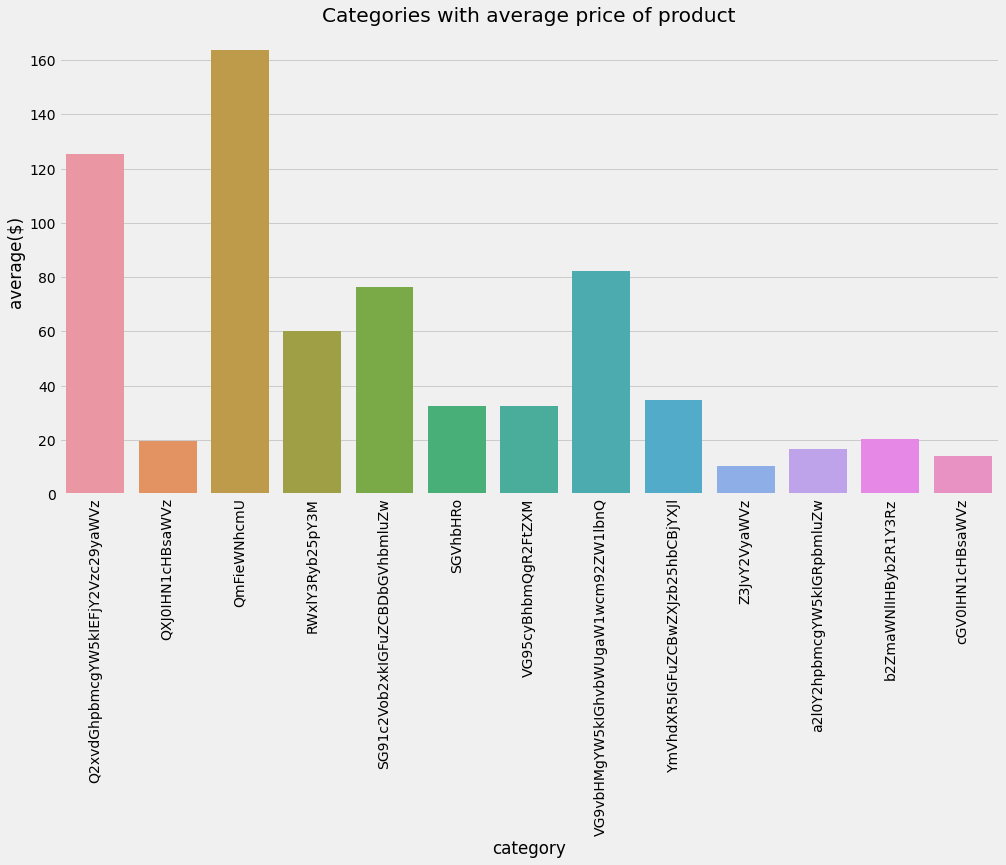

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.title("Categories with average price of product")
plt.xlabel("Category")
plt.ylabel("Average($)")
sns.barplot(y=ca['average($)'][:],x=ca.index[:])
plt.xticks(rotation = 90)
plt.show()
#plt.savefig('avg_ca_price.png')